## Домашняя работа 3
### Задание 1
Используя данные Yahoo Finance, проверьте на стационарность ряд из лог-приростов цены на нефть.

In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [3]:
brent_data = yf.download('BZ=F', start='2023-11-21', end='2024-11-21')
brent_data['Log_Returns'] = np.log(brent_data['Adj Close'] / brent_data['Adj Close'].shift(1))
log_returns = brent_data['Log_Returns'].dropna()

[*********************100%***********************]  1 of 1 completed


In [4]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
adf_test(log_returns)        

ADF Statistic: -15.563330
p-value: 0.000000
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


### Задание 2
Используя данные Yahoo Finance, постройте линейную регрессию курса доллара США к рублю к цене на нефть и проверьте значимость параметров.

In [6]:
rub_data = yf.download('RUB=X', start='2023-11-21', end='2024-11-21')

[*********************100%***********************]  1 of 1 completed


In [7]:
rub_data = rub_data[['Adj Close']].rename(columns={'Adj Close': 'USD_RUB'})
brent_data = brent_data[['Adj Close']].rename(columns={'Adj Close': 'Oil_Price'})

data = pd.concat([rub_data['USD_RUB'], brent_data['Oil_Price']], axis=1)
data.dropna(inplace=True) 

In [8]:
X = sm.add_constant(data['BZ=F'])  # В качестве объясняющей переменной используем цену на нефть
y = data['RUB=X']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  RUB=X   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     24.06
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           1.68e-06
Time:                        21:50:06   Log-Likelihood:                -641.47
No. Observations:                 253   AIC:                             1287.
Df Residuals:                     251   BIC:                             1294.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        106.5113      3.122     34.113      0.0

### Задача 3

Постройте линейную регрессию логарифма курса доллара США к рублю к логарифму цены на нефть и проверьте значимость параметров.

In [10]:
data['Log_USD_RUB'] = np.log(data['RUB=X'])
data['Log_Oil_Price'] = np.log(data['BZ=F'])

In [11]:
X = sm.add_constant(data['Log_Oil_Price'])
y = data['Log_USD_RUB']

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Log_USD_RUB   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     25.02
Date:                Thu, 21 Nov 2024   Prob (F-statistic):           1.07e-06
Time:                        21:50:06   Log-Likelihood:                 502.47
No. Observations:                 253   AIC:                            -1001.
Df Residuals:                     251   BIC:                            -993.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             5.2522      0.148     35.523

### Задача 4

Исследуйте автокорреляцию лог-приростов цены на нефть. Постройте авторегрессионную модель для прогнозирования цен на нефть.

In [13]:
brent_data4 = yf.download('BZ=F', start='2023-11-21', end='2024-11-21')

[*********************100%***********************]  1 of 1 completed


In [14]:
brent_data4['Log_Price'] = np.log(brent_data4['Adj Close'])

brent_data4['Log_Returns'] = brent_data4['Log_Price'].diff()
brent_data4 = brent_data4.dropna()

<Figure size 1200x600 with 0 Axes>

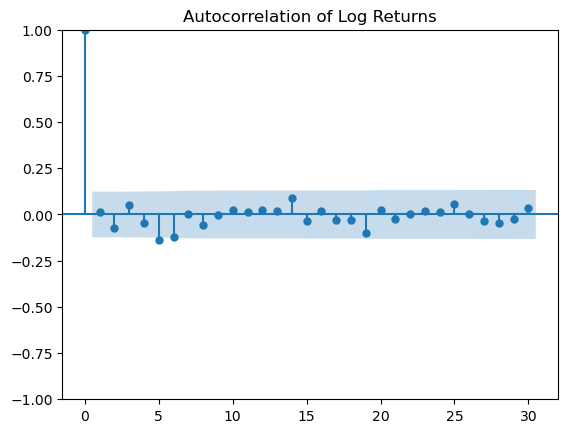

In [15]:
plt.figure(figsize=(12, 6))
plot_acf(brent_data4['Log_Returns'], lags=30)
plt.title('Autocorrelation of Log Returns')
plt.show()

<Figure size 1200x600 with 0 Axes>

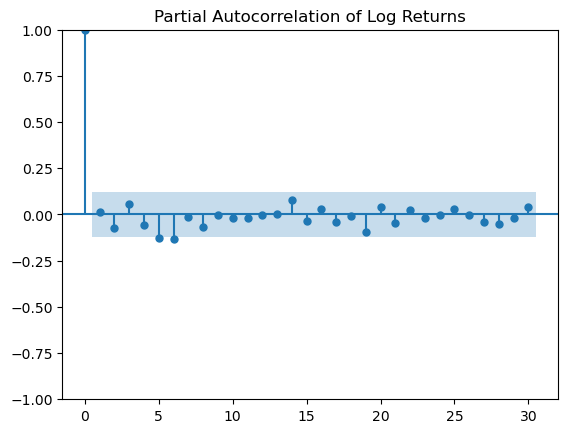

In [16]:
plt.figure(figsize=(12, 6))
plot_pacf(brent_data4['Log_Returns'], lags=30)
plt.title('Partial Autocorrelation of Log Returns')
plt.show()

In [17]:
p = 2 
d = 1
q = 2 

model = ARIMA(brent_data4['Log_Price'], order=(p, d, q))
model_fit = model.fit()

print(model_fit.summary())

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressiv

                               SARIMAX Results                                
Dep. Variable:              Log_Price   No. Observations:                  252
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 663.126
Date:                Thu, 21 Nov 2024   AIC                          -1316.252
Time:                        21:50:07   BIC                          -1298.624
Sample:                             0   HQIC                         -1309.158
                                - 252                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2094      0.364      0.575      0.565      -0.504       0.923
ar.L2          0.5469      0.323      1.692      0.091      -0.087       1.181
ma.L1         -0.2057      0.328     -0.626      0.5

In [18]:
forecast = model_fit.get_forecast(steps=30)
forecast_index = pd.date_range(start=brent_data4.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')
forecast_prices = np.exp(forecast.predicted_mean)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [19]:
a=list(forecast_prices)
forecast_df = pd.DataFrame({'Forecasted Price': a}, index=forecast_index)

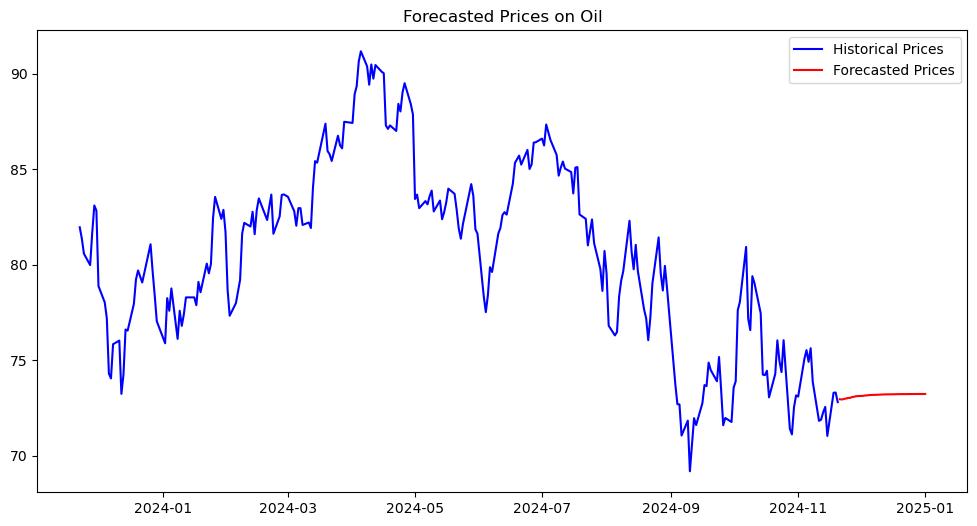

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(brent_data4['Adj Close'], label='Historical Prices', color='blue')
plt.plot(forecast_df, label='Forecasted Prices', color='red')
plt.title('Forecasted Prices on Oil')
plt.legend()
plt.show()